# Markov Chains: Irreducibility and Ergodicity

```{index} single: Markov Chains: Irreducibility and Ergodicity
```

In addition to what's in Anaconda, this lecture will need the following libraries:

In [1]:
!pip install quantecon

## Overview

This lecture continues on from our {doc}`earlier lecture on Markov chains
<markov_chains_I>`.


Specifically, we will introduce the concepts of irreducibility and ergodicity, and see how they connect to stationarity.

Irreducibility describes the ability of a Markov chain to move between any two states in the system.

Ergodicity is a sample path property that describes the behavior of the system over long periods of time. 

As we will see, 

* an irreducible Markov chain guarantees the existence of a unique stationary distribution, while 
* an ergodic Markov chain generates time series that satisfy a version of the
  law of large numbers. 

Together, these concepts provide a foundation for understanding the long-term behavior of Markov chains.

Let's start with some standard imports:

In [2]:
import matplotlib.pyplot as plt
import quantecon as qe
import numpy as np

(mc_irreducible)=
## Irreducibility


To explain irreducibility, let's take $P$ to be a fixed stochastic matrix.

State $x$ is called **accessible** (or **reachable**) from state $y$ if $P^t(x,y)>0$ for some integer $t\ge 0$. 

Two states, $x$ and $y$, are said to **communicate** if $x$ and $y$ are accessible from each other.

In view of our discussion {ref}`above <finite_mc_mstp>`, this means precisely
that

* state $x$ can eventually be reached from state $y$, and
* state $y$ can eventually be reached from state $x$

The stochastic matrix $P$ is called **irreducible** if all states communicate;
that is, if $x$ and $y$ communicate for all $(x, y)$ in $S \times S$.

```{prf:example}
:label: mc2_ex_ir
For example, consider the following transition probabilities for wealth of a
fictitious set of households

```{image} /_static/lecture_specific/markov_chains_II/Irre_1.png
:name: mc_irre1
:align: center
```



We can translate this into a stochastic matrix, putting zeros where
there's no edge between nodes

$$
P :=
\begin{bmatrix} 
     0.9 & 0.1 & 0 \\
     0.4 & 0.4 & 0.2 \\
     0.1 & 0.1 & 0.8
\end{bmatrix} 
$$

It's clear from the graph that this stochastic matrix is irreducible: we can  eventually
reach any state from any other state.
```

We can also test this using [QuantEcon.py](http://quantecon.org/quantecon-py)'s MarkovChain class

```{code-cell} ipython3
P = [[0.9, 0.1, 0.0],
     [0.4, 0.4, 0.2],
     [0.1, 0.1, 0.8]]

mc = qe.MarkovChain(P, ('poor', 'middle', 'rich'))
mc.is_irreducible
```

```{prf:example}
:label: mc2_ex_pf

Here's a more pessimistic scenario in which  poor people remain poor forever

```{image} /_static/lecture_specific/markov_chains_II/Irre_2.png
:name: mc_irre2
:align: center
```

This stochastic matrix is not irreducible since, for example, rich is not
accessible from poor.
```

Let's confirm this

```{code-cell} ipython3
P = [[1.0, 0.0, 0.0],
     [0.1, 0.8, 0.1],
     [0.0, 0.2, 0.8]]

mc = qe.MarkovChain(P, ('poor', 'middle', 'rich'))
mc.is_irreducible
```

It might be clear to you already that irreducibility is going to be important
in terms of long-run outcomes.

For example, poverty is a life sentence in the second graph but not the first.

We'll come back to this a bit later.

### Irreducibility and stationarity

We discussed uniqueness of stationary distributions in our earlier lecture {doc}`markov_chains_I`.

There we {prf:ref}`stated <mc_po_conv_thm>` that uniqueness holds when the transition matrix is everywhere positive.

In fact irreducibility is sufficient:

```{prf:theorem}
:label: mc_conv_thm

If $P$ is irreducible, then $P$ has exactly one stationary
distribution.
```

For proof, see Chapter 4 of {cite}`sargent2023economic` or
Theorem 5.2 of {cite}`haggstrom2002finite`.


(ergodicity)=
## Ergodicity


Under irreducibility, yet another important result obtains:

````{prf:theorem}
:label: stationary

If $P$ is irreducible and $\psi^*$ is the unique stationary
distribution, then, for all $x \in S$,

```{math}
:label: llnfmc0

\frac{1}{m} \sum_{t = 1}^m \mathbb{1}\{X_t = x\}  \to \psi^*(x)
    \quad \text{as } m \to \infty
```

````

Here

* $\{X_t\}$ is a Markov chain with stochastic matrix $P$ and initial distribution $\psi_0$

* $\mathbb{1} \{X_t = x\} = 1$ if $X_t = x$ and zero otherwise.

The result in [theorem 4.3](llnfmc0) is sometimes called **ergodicity**.

The theorem tells us that the fraction of time the chain spends at state $x$
converges to $\psi^*(x)$ as time goes to infinity.

(new_interp_sd)=
This gives us another way to interpret the stationary distribution (provided irreducibility holds).

Importantly, the result is valid for any choice of $\psi_0$.

The theorem is related to {doc}`the law of large numbers <lln_clt>`.

It tells us that, in some settings, the law of large numbers sometimes holds even when the
sequence of random variables is [not IID](iid_violation).


(mc_eg1-2)=
### Example: ergodicity and unemployment

Recall our cross-sectional interpretation of the employment/unemployment model {ref}`discussed before <mc_eg1-1>`.

Assume that $\alpha \in (0,1)$ and $\beta \in (0,1)$, so that irreducibility holds.

We saw that the stationary distribution is $(p, 1-p)$, where

$$
p = \frac{\beta}{\alpha + \beta}
$$

In the cross-sectional interpretation, this is the fraction of people unemployed.

In view of our latest (ergodicity) result, it is also the fraction of time that a single worker can expect to spend unemployed.

Thus, in the long run, cross-sectional averages for a population and time-series averages for a given person coincide.

This is one aspect of the concept  of ergodicity.


(ergo)=
### Example: Hamilton dynamics

Another example is the Hamilton dynamics we {ref}`discussed before <mc_eg2>`.

Let $\{X_t\}$ be a sample path generated by these dynamics.

Let's denote the fraction of time spent in state $x$ over the period $t=1,
\ldots, n$ by $\hat p_n(x)$, so that 

$$
    \hat p_n(x) := \frac{1}{n} \sum_{t = 1}^n \mathbb{1}\{X_t = x\}
    \qquad (x \in \{0, 1, 2\})
$$


The {ref}`graph <mc_eg2>` of the Markov chain shows it is irreducible, so
ergodicity holds.

Hence we expect that $\hat p_n(x) \approx \psi^*(x)$ when $n$ is large.

The next figure shows convergence of $\hat p_n(x)$ to $\psi^*(x)$ when $x=1$ and
$X_0$ is either $0, 1$ or $2$.

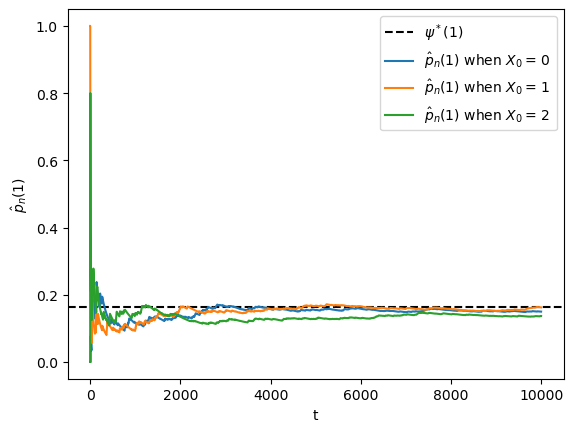

In [3]:
P = np.array([[0.971, 0.029, 0.000],
              [0.145, 0.778, 0.077],
              [0.000, 0.508, 0.492]])
ts_length = 10_000
mc = qe.MarkovChain(P)
ψ_star = mc.stationary_distributions[0]
x = 1  # We study convergence to psi^*(x) 

fig, ax = plt.subplots()
ax.axhline(ψ_star[x], linestyle='dashed', color='black', 
                label = fr'$\psi^*({x})$')
# Compute the fraction of time spent in state 0, starting from different x_0s
for x0 in range(len(P)):
    X = mc.simulate(ts_length, init=x0)
    p_hat = (X == x).cumsum() / np.arange(1, ts_length+1)
    ax.plot(p_hat, label=fr'$\hat p_n({x})$ when $X_0 = \, {x0}$')
ax.set_xlabel('t')
ax.set_ylabel(fr'$\hat p_n({x})$')
ax.legend()
plt.show()

You might like to try changing $x=1$ to either $x=0$ or $x=2$.

In any of these cases, ergodicity will hold.

### Example: a periodic chain

```{prf:example}
:label: mc2_ex_pc

Let's look at the following example with states 0 and 1:

$$
P :=
\begin{bmatrix} 
     0 & 1\\
     1 & 0\\
\end{bmatrix} 
$$


The transition graph shows that this model is irreducible.

```{image} /_static/lecture_specific/markov_chains_II/example4.png
:name: mc_example4
:align: center
```

Notice that there is a periodic cycle --- the state cycles between the two states in a regular way.
```
Not surprisingly, this property 
is called [periodicity](https://stats.libretexts.org/Bookshelves/Probability_Theory/Probability_Mathematical_Statistics_and_Stochastic_Processes_(Siegrist)/16%3A_Markov_Processes/16.05%3A_Periodicity_of_Discrete-Time_Chains).

Nonetheless, the model is irreducible, so ergodicity holds.

The following figure illustrates

```{code-cell} ipython3
P = np.array([[0, 1],
              [1, 0]])
ts_length = 100
mc = qe.MarkovChain(P)
n = len(P)
fig, axes = plt.subplots(nrows=1, ncols=n)
ψ_star = mc.stationary_distributions[0]

for i in range(n):
    axes[i].axhline(ψ_star[i], linestyle='dashed', lw=2, color='black', 
                    label = fr'$\psi^*({i})$')
    axes[i].set_xlabel('t')
    axes[i].set_ylabel(fr'$\hat p_n({i})$')

    # Compute the fraction of time spent, for each x
    for x0 in range(n):
        # Generate time series starting at different x_0
        X = mc.simulate(ts_length, init=x0)
        p_hat = (X == i).cumsum() / np.arange(1, ts_length+1)
        axes[i].plot(p_hat, label=f'$x_0 = \, {x0} $')

    axes[i].legend()
plt.tight_layout()
plt.show()
```

This example helps to emphasize that asymptotic stationarity is about the distribution, while ergodicity is about the sample path.

The proportion of time spent in a state can converge to the stationary distribution with periodic chains.

However, the distribution at each state does not.

### Example:  political institutions

Let's go back to the political institutions model with six states discussed {ref}`in a previous lecture <mc_eg3>` and study ergodicity.


Here's the transition matrix.

$$
    P :=
    \begin{bmatrix} 
        0.86 & 0.11 & 0.03 & 0.00 & 0.00 & 0.00 \\
        0.52 & 0.33 & 0.13 & 0.02 & 0.00 & 0.00 \\
        0.12 & 0.03 & 0.70 & 0.11 & 0.03 & 0.01 \\
        0.13 & 0.02 & 0.35 & 0.36 & 0.10 & 0.04 \\
        0.00 & 0.00 & 0.09 & 0.11 & 0.55 & 0.25 \\
        0.00 & 0.00 & 0.09 & 0.15 & 0.26 & 0.50
    \end{bmatrix} 
$$


The {ref}`graph <mc_eg3>` for the chain shows all states are reachable,
indicating that this chain is irreducible.

In the next figure, we visualize the difference $\hat p_n(x) - \psi^* (x)$ for each state $x$.

Unlike the previous figure, $X_0$ is held fixed.

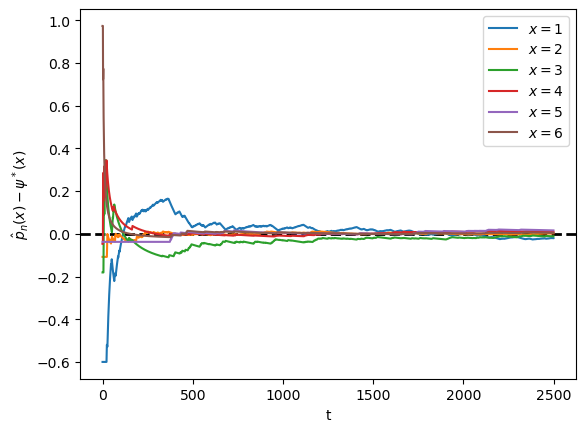

In [4]:
P = [[0.86, 0.11, 0.03, 0.00, 0.00, 0.00],
     [0.52, 0.33, 0.13, 0.02, 0.00, 0.00],
     [0.12, 0.03, 0.70, 0.11, 0.03, 0.01],
     [0.13, 0.02, 0.35, 0.36, 0.10, 0.04],
     [0.00, 0.00, 0.09, 0.11, 0.55, 0.25],
     [0.00, 0.00, 0.09, 0.15, 0.26, 0.50]]

ts_length = 2500
mc = qe.MarkovChain(P)
ψ_star = mc.stationary_distributions[0]
fig, ax = plt.subplots()
X = mc.simulate(ts_length, random_state=1)
# Center the plot at 0
ax.axhline(linestyle='dashed', lw=2, color='black')


for x0 in range(len(P)):
    # Calculate the fraction of time for each state
    p_hat = (X == x0).cumsum() / np.arange(1, ts_length+1)
    ax.plot(p_hat - ψ_star[x0], label=f'$x = {x0+1} $')
    ax.set_xlabel('t')
    ax.set_ylabel(r'$\hat p_n(x) - \psi^* (x)$')

ax.legend()
plt.show()

## Exercises

````{exercise}
:label: mc_ex1

Benhabib et al. {cite}`benhabib_wealth_2019` estimated that the transition matrix for social mobility as the following

$$
P:=
    \begin{bmatrix} 
        0.222 & 0.222 & 0.215 & 0.187 & 0.081 & 0.038 & 0.029 & 0.006 \\
        0.221 & 0.22 & 0.215 & 0.188 & 0.082 & 0.039 & 0.029 & 0.006 \\
        0.207 & 0.209 & 0.21 & 0.194 & 0.09 & 0.046 & 0.036 & 0.008 \\ 
        0.198 & 0.201 & 0.207 & 0.198 & 0.095 & 0.052 & 0.04 & 0.009 \\ 
        0.175 & 0.178 & 0.197 & 0.207 & 0.11 & 0.067 & 0.054 & 0.012 \\ 
        0.182 & 0.184 & 0.2 & 0.205 & 0.106 & 0.062 & 0.05 & 0.011 \\ 
        0.123 & 0.125 & 0.166 & 0.216 & 0.141 & 0.114 & 0.094 & 0.021 \\ 
        0.084 & 0.084 & 0.142 & 0.228 & 0.17 & 0.143 & 0.121 & 0.028
\end{bmatrix} 
$$

where each state 1 to 8 corresponds to a  percentile of wealth shares

$$
0-20 \%, 20-40 \%, 40-60 \%, 60-80 \%, 80-90 \%, 90-95 \%, 95-99 \%, 99-100 \%
$$

The matrix is recorded as `P` below

```python
P = [
    [0.222, 0.222, 0.215, 0.187, 0.081, 0.038, 0.029, 0.006],
    [0.221, 0.22,  0.215, 0.188, 0.082, 0.039, 0.029, 0.006],
    [0.207, 0.209, 0.21,  0.194, 0.09,  0.046, 0.036, 0.008],
    [0.198, 0.201, 0.207, 0.198, 0.095, 0.052, 0.04,  0.009],
    [0.175, 0.178, 0.197, 0.207, 0.11,  0.067, 0.054, 0.012],
    [0.182, 0.184, 0.2,   0.205, 0.106, 0.062, 0.05,  0.011],
    [0.123, 0.125, 0.166, 0.216, 0.141, 0.114, 0.094, 0.021],
    [0.084, 0.084, 0.142, 0.228, 0.17,  0.143, 0.121, 0.028]
    ]

P = np.array(P)
codes_B = ('1','2','3','4','5','6','7','8')
```

1. Show this process is asymptotically stationary and calculate an approximation to the stationary distribution.

1. Use simulations to illustrate ergodicity.

````

```{solution-start} mc_ex1
:class: dropdown
```
Part 1:

One option is to take the power of the transition matrix.

In [5]:
P = [[0.222, 0.222, 0.215, 0.187, 0.081, 0.038, 0.029, 0.006],
     [0.221, 0.22,  0.215, 0.188, 0.082, 0.039, 0.029, 0.006],
     [0.207, 0.209, 0.21,  0.194, 0.09,  0.046, 0.036, 0.008],
     [0.198, 0.201, 0.207, 0.198, 0.095, 0.052, 0.04,  0.009],
     [0.175, 0.178, 0.197, 0.207, 0.11,  0.067, 0.054, 0.012],
     [0.182, 0.184, 0.2,   0.205, 0.106, 0.062, 0.05,  0.011],
     [0.123, 0.125, 0.166, 0.216, 0.141, 0.114, 0.094, 0.021],
     [0.084, 0.084, 0.142, 0.228, 0.17,  0.143, 0.121, 0.028]]

P = np.array(P)
codes_B = ('1','2','3','4','5','6','7','8')

np.linalg.matrix_power(P, 10)

array([[0.20254451, 0.20379879, 0.20742102, 0.19505842, 0.09287832,
        0.0503871 , 0.03932382, 0.00858802],
       [0.20254451, 0.20379879, 0.20742102, 0.19505842, 0.09287832,
        0.0503871 , 0.03932382, 0.00858802],
       [0.20254451, 0.20379879, 0.20742102, 0.19505842, 0.09287832,
        0.0503871 , 0.03932382, 0.00858802],
       [0.20254451, 0.20379879, 0.20742102, 0.19505842, 0.09287832,
        0.0503871 , 0.03932382, 0.00858802],
       [0.20254451, 0.20379879, 0.20742102, 0.19505842, 0.09287832,
        0.0503871 , 0.03932382, 0.00858802],
       [0.20254451, 0.20379879, 0.20742102, 0.19505842, 0.09287832,
        0.0503871 , 0.03932382, 0.00858802],
       [0.20254451, 0.20379879, 0.20742102, 0.19505842, 0.09287832,
        0.0503871 , 0.03932382, 0.00858802],
       [0.20254451, 0.20379879, 0.20742102, 0.19505842, 0.09287832,
        0.0503871 , 0.03932382, 0.00858802]])

For this model, rows of $P^n$ converge to the stationary distribution as $n \to
\infty$:

In [6]:
mc = qe.MarkovChain(P)
ψ_star = mc.stationary_distributions[0]
ψ_star

array([0.20254451, 0.20379879, 0.20742102, 0.19505842, 0.09287832,
       0.0503871 , 0.03932382, 0.00858802])

Part 2:

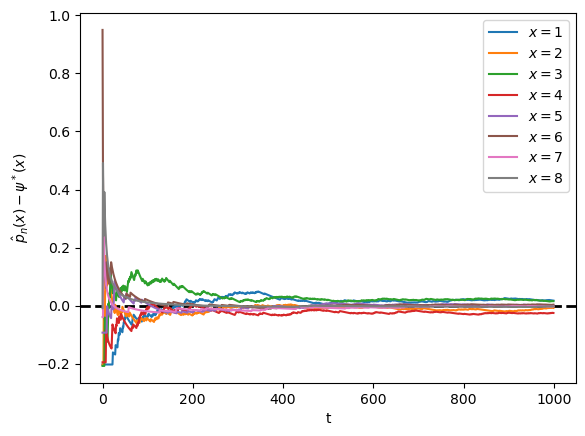

In [7]:
ts_length = 1000
mc = qe.MarkovChain(P)
fig, ax = plt.subplots()
X = mc.simulate(ts_length, random_state=1)
ax.axhline(linestyle='dashed', lw=2, color='black')

for x0 in range(len(P)):
    # Calculate the fraction of time for each worker
    p_hat = (X == x0).cumsum() / np.arange(1, ts_length+1)
    ax.plot(p_hat - ψ_star[x0], label=f'$x = {x0+1} $')
    ax.set_xlabel('t')
    ax.set_ylabel(r'$\hat p_n(x) - \psi^* (x)$')

ax.legend()
plt.show()

Note that the fraction of time spent at each state converges to the probability
assigned to that state by the stationary distribution.

```{solution-end}
```


```{exercise}
:label: mc_ex2

According to the discussion {ref}`above <mc_eg1-2>`, if a worker's employment dynamics obey the stochastic matrix

$$
P := 
\begin{bmatrix} 
1 - \alpha & \alpha \\
\beta & 1 - \beta
\end{bmatrix} 
$$

with $\alpha \in (0,1)$ and $\beta \in (0,1)$, then, in the long run, the fraction
of time spent unemployed will be

$$
p := \frac{\beta}{\alpha + \beta}
$$

In other words, if $\{X_t\}$ represents the Markov chain for
employment, then $\bar X_m \to p$ as $m \to \infty$, where

$$
\bar X_m := \frac{1}{m} \sum_{t = 1}^m \mathbb{1}\{X_t = 0\}
$$

This exercise asks you to illustrate convergence by computing
$\bar X_m$ for large $m$ and checking that
it is close to $p$.

You will see that this statement is true regardless of the choice of initial
condition or the values of $\alpha, \beta$, provided both lie in
$(0, 1)$.

The result should be similar to the plot we plotted [here](ergo)
```

```{solution-start} mc_ex2
:class: dropdown
```

We will address this exercise graphically.

The plots show the time series of $\bar X_m - p$ for two initial
conditions.

As $m$ gets large, both series converge to zero.

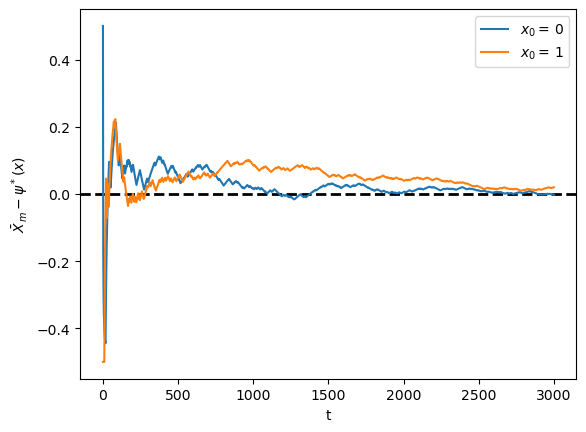

In [8]:
α = β = 0.1
ts_length = 3000
p = β / (α + β)

P = ((1 - α,       α),               # Careful: P and p are distinct
     (    β,   1 - β))
mc = qe.MarkovChain(P)

fig, ax = plt.subplots()
ax.axhline(linestyle='dashed', lw=2, color='black')

for x0 in range(len(P)):
    # Generate time series for worker that starts at x0
    X = mc.simulate(ts_length, init=x0)
    # Compute fraction of time spent unemployed, for each n
    X_bar = (X == 0).cumsum() / np.arange(1, ts_length+1)
    # Plot
    ax.plot(X_bar - p, label=f'$x_0 = \, {x0} $')
    ax.set_xlabel('t')
    ax.set_ylabel(r'$\bar X_m - \psi^* (x)$')
    
ax.legend()
plt.show()

```{solution-end}
```

```{exercise}
:label: mc_ex3

In `quantecon` library, irreducibility is tested by checking whether the chain forms a [strongly connected component](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.components.is_strongly_connected.html).

Another way to test irreducibility is via the following statement:

The $n \times n$ matrix $A$ is irreducible if and only if $\sum_{k=0}^{n-1}A^k$
is a strictly positive matrix.

(see, e.g., {cite}`zhao_power_2012` and [this StackExchange post](https://math.stackexchange.com/questions/3336616/how-to-prove-this-matrix-is-a-irreducible-matrix))

Based on this claim, write a function to test irreducibility.

```

```{solution-start} mc_ex3
:class: dropdown
```

In [9]:
def is_irreducible(P):
    n = len(P)
    result = np.zeros((n, n))
    for i in range(n):
        result += np.linalg.matrix_power(P, i)
    return np.all(result > 0)

Let's try it.

In [10]:
P1 = np.array([[0, 1],
               [1, 0]])
P2 = np.array([[1.0, 0.0, 0.0],
               [0.1, 0.8, 0.1],
               [0.0, 0.2, 0.8]])
P3 = np.array([[0.971, 0.029, 0.000],
               [0.145, 0.778, 0.077],
               [0.000, 0.508, 0.492]])

for P in (P1, P2, P3):
    result = lambda P: 'irreducible' if is_irreducible(P) else 'reducible'
    print(f'{P}: {result(P)}')

[[0 1]
 [1 0]]: irreducible
[[1.  0.  0. ]
 [0.1 0.8 0.1]
 [0.  0.2 0.8]]: reducible
[[0.971 0.029 0.   ]
 [0.145 0.778 0.077]
 [0.    0.508 0.492]]: irreducible


```{solution-end}
```